# Setup

In [7]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use("ggplot")
sns.set(font_scale=1.1)

# Reproducibility
np.random.seed(42)

# Display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Merged Flow Comparison Data

In [8]:
merged_df = pd.read_csv("../data/merged_flow_comparison.csv", parse_dates=["date"])

# Preview the data
merged_df.head()

,ticker_id,provider,date,inflow_internal,outflow_internal,net_flow_internal,inflow_mstar,outflow_mstar,net_flow_mstar,inflow_bbg,outflow_bbg,net_flow_bbg,inflow_abs_diff_mstar,inflow_rel_diff_mstar,outflow_abs_diff_mstar,outflow_rel_diff_mstar,net_flow_abs_diff_mstar,net_flow_rel_diff_mstar,inflow_abs_diff_bbg,inflow_rel_diff_bbg,outflow_abs_diff_bbg,outflow_rel_diff_bbg,net_flow_abs_diff_bbg,net_flow_rel_diff_bbg
0,SPY,BlackRock,2024-01-01,2.790884e+08,2.282514e+08,5.083700e+07,2.862376e+08,2.287465e+08,5.749107e+07,2.812535e+08,2.309926e+08,5.026093e+07,7149213.04,0.0256,495145.07,0.0022,6654067.97,0.1309,2165120.80,0.0078,2741188.04,0.0120,576067.24,0.0113
1,SPY,BlackRock,2024-01-02,2.214562e+07,3.302482e+08,-3.081026e+08,2.363823e+07,3.315475e+08,-3.079093e+08,2.501097e+07,3.326184e+08,-3.076074e+08,1492609.43,0.0674,1299285.14,0.0039,193324.29,-0.0006,2865347.26,0.1294,2370147.20,0.0072,495200.06,-0.0016
2,SPY,BlackRock,2024-01-03,2.291880e+08,2.699678e+08,-4.077986e+07,2.307983e+08,2.714666e+08,-4.066825e+07,2.297194e+08,2.701330e+08,-4.041357e+07,1610341.92,0.0070,1498723.25,0.0056,111618.67,-0.0027,531410.90,0.0023,165115.98,0.0006,366294.92,-0.0090
3,SPY,BlackRock,2024-01-04,6.932467e+07,6.992690e+07,-6.022345e+05,7.026934e+07,7.106912e+07,-7.997796e+05,7.082328e+07,7.113441e+07,-3.111331e+05,944678.57,0.0136,1142223.68,0.0163,197545.11,-0.3280,1498612.27,0.0216,1207510.89,0.0173,291101.38,-0.4834
4,SPY,BlackRock,2024-01-05,1.159989e+08,2.000746e+08,-8.407576e+07,1.236285e+08,2.017071e+08,-7.807866e+07,1.172184e+08,2.056761e+08,-8.845772e+07,7629583.10,0.0658,1632479.93,0.0082,5997103.17,-0.0713,1219546.70,0.0105,5601504.10,0.0280,4381957.40,-0.0521


# Flag and Rank Discrepancies

In [9]:
threshold = 0.10  # 10%

# Add boolean flags
for source in ["mstar", "bbg"]:
    for metric in ["inflow", "outflow", "net_flow"]:
        rel_col = f"{metric}_rel_diff_{source}"
        flag_col = f"{metric}_flag_{source}"
        merged_df[flag_col] = merged_df[rel_col] > threshold

# Count flags per row (how many metrics are out of spec)
merged_df["num_flags_mstar"] = merged_df[[f"{m}_flag_mstar" for m in ["inflow", "outflow", "net_flow"]]].sum(axis=1)
merged_df["num_flags_bbg"] = merged_df[[f"{m}_flag_bbg" for m in ["inflow", "outflow", "net_flow"]]].sum(axis=1)

# Preview rows with highest number of Morningstar flags
merged_df.sort_values("num_flags_mstar", ascending=False).head()

,ticker_id,provider,date,inflow_internal,outflow_internal,net_flow_internal,inflow_mstar,outflow_mstar,net_flow_mstar,inflow_bbg,outflow_bbg,net_flow_bbg,inflow_abs_diff_mstar,inflow_rel_diff_mstar,outflow_abs_diff_mstar,outflow_rel_diff_mstar,net_flow_abs_diff_mstar,net_flow_rel_diff_mstar,inflow_abs_diff_bbg,inflow_rel_diff_bbg,outflow_abs_diff_bbg,outflow_rel_diff_bbg,net_flow_abs_diff_bbg,net_flow_rel_diff_bbg,inflow_flag_mstar,outflow_flag_mstar,net_flow_flag_mstar,inflow_flag_bbg,outflow_flag_bbg,net_flow_flag_bbg,num_flags_mstar,num_flags_bbg
1960,VOO,Charles Schwab,2024-05-10,12157129.02,11621960.45,535168.57,16787639.35,12972955.02,3814684.33,15268158.44,16111989.71,-843831.27,4630510.33,0.3809,1350994.57,0.1162,3279515.76,6.1280,3111029.42,0.2559,4490029.26,0.3863,1378999.84,2.5768,True,True,True,True,True,True,3,3
7814,EFA,BlackRock,2024-05-08,18787686.35,8265573.85,10522112.50,22470933.71,10224915.81,12246017.90,23339860.52,9297257.75,14042602.77,3683247.36,0.1960,1959341.96,0.2370,1723905.40,0.1638,4552174.17,0.2423,1031683.90,0.1248,3520490.27,0.3346,True,True,True,True,True,True,3,3
20549,AMZN,Charles Schwab,2024-02-23,27963587.79,1824472.22,26139115.57,37512237.60,4575199.26,32937038.34,36984687.19,4672128.87,32312558.32,9548649.81,0.3415,2750727.04,1.5077,6797922.77,0.2601,9021099.40,0.3226,2847656.65,1.5608,6173442.75,0.2362,True,True,True,True,True,True,3,3
12281,FXAIX,Vanguard,2024-07-22,18135204.87,4382146.94,13753057.93,22853491.02,6462731.72,16390759.30,24399447.03,7803775.55,16595671.48,4718286.15,0.2602,2080584.78,0.4748,2637701.37,0.1918,6264242.16,0.3454,3421628.61,0.7808,2842613.55,0.2067,True,True,True,True,True,True,3,3
49946,GE,BlackRock,2024-06-19,56058306.04,23396449.37,32661856.67,64238955.42,26152558.82,38086396.60,58721784.50,26480186.82,32241597.68,8180649.38,0.1459,2756109.45,0.1178,5424539.93,0.1661,2663478.46,0.0475,3083737.45,0.1318,420258.99,0.0129,True,True,True,False,True,False,3,1


# Visualize Discrepancies by Provider

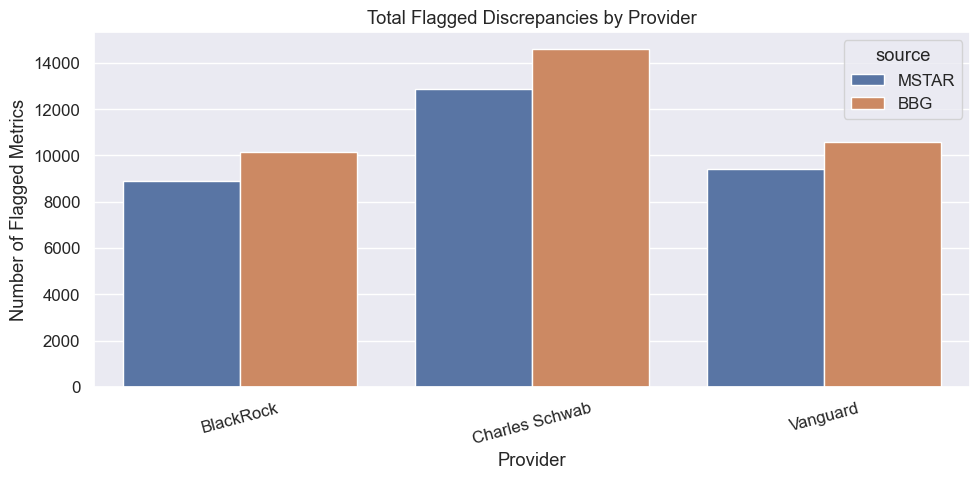

In [10]:
# Sum flag counts per provider
flag_summary = merged_df.groupby("provider")[["num_flags_mstar", "num_flags_bbg"]].sum().reset_index()

# Rename for plotting
flag_summary = flag_summary.melt(id_vars="provider", var_name="source", value_name="flag_count")
flag_summary["source"] = flag_summary["source"].str.replace("num_flags_", "").str.upper()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=flag_summary, x="provider", y="flag_count", hue="source")
plt.title("Total Flagged Discrepancies by Provider")
plt.ylabel("Number of Flagged Metrics")
plt.xlabel("Provider")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Export Flagged Dependencies

In [11]:
# Filter for rows where either source has any flags
flagged_rows = merged_df[
    (merged_df["num_flags_mstar"] > 0) | (merged_df["num_flags_bbg"] > 0)
].copy()

# Optional: keep a tidy set of columns
flagged_export = flagged_rows[[
    "ticker_id", "provider", "date",
    "net_flow_internal", "net_flow_mstar", "net_flow_bbg",
    "net_flow_rel_diff_mstar", "net_flow_rel_diff_bbg",
    "num_flags_mstar", "num_flags_bbg"
]]

# Save to CSV
flagged_path = "../data/flagged_discrepancy_rows.csv"
flagged_export.to_csv(flagged_path, index=False)

flagged_path

'../data/flagged_discrepancy_rows.csv'